# Introduction to PCA

Principal Component Analysis (PCA) is a dimension reduction technique that was first formulated by [Karl Pearson already in 1901](https://zenodo.org/record/1430636#.X0yqxNMzbdc). In this introduction, we will walk through the underlying theory of PCA, show how to run it in R, and interpret the results. We will work with small data sets throughout, where we can interpret the variables and make individual plots. 

## Preparation

We start by loading some R packages that we will use later on for plotting. If you are not familiar with these packages, that's not a problem; all necessary code will be provided.

In [1]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(ggrepel)
    library(ggcorrplot)
    library(dplyr)
    library(tibble)
})

In addition, we take a first look at the data set we will be using (`mtcars`). This is a built-in data set in R, which contains data on fuel consumption and aspects of design and performance for 32 types of cars (1973-1974 models).

In [2]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


We can get more information about the variables by typing `?mtcars`, which tells us what the different columns mean: 

Format:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon
       [, 2]  cyl   Number of cylinders
       [, 3]  disp  Displacement (cu.in.)
       [, 4]  hp    Gross horsepower
       [, 5]  drat  Rear axle ratio
       [, 6]  wt    Weight (1000 lbs)
       [, 7]  qsec  1/4 mile time
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)
       [, 9]  am    Transmission (0 = automatic, 1 = manual)
       [,10]  gear  Number of forward gears
       [,11]  carb  Number of carburetors

For later reference, we'll also plot the correlations among the variables.

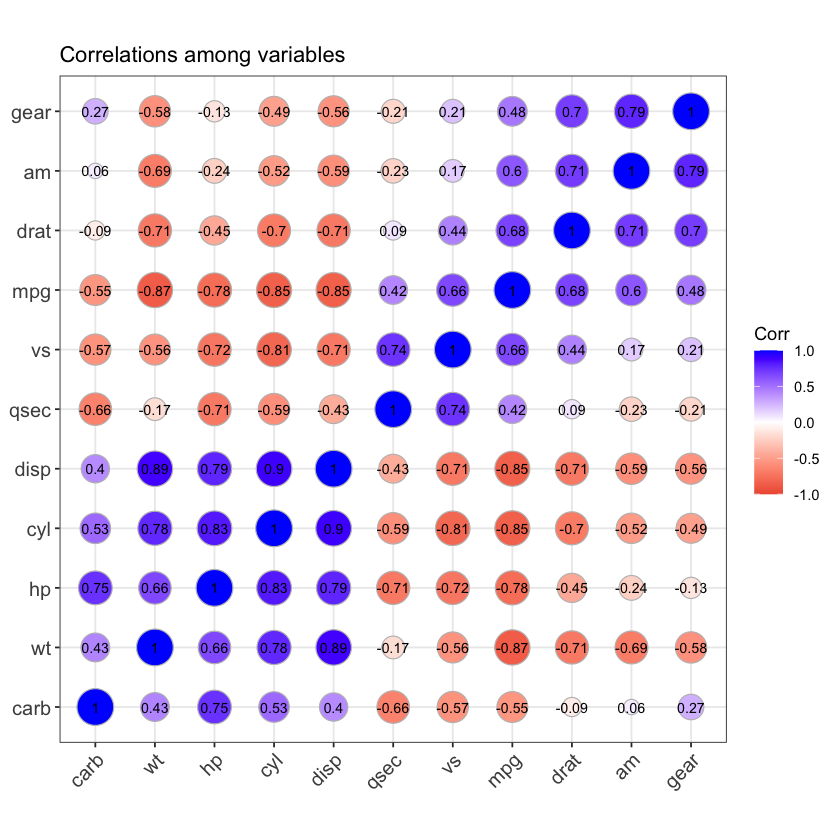

In [3]:
ggcorrplot(round(cor(mtcars),3), 
           hc.order = TRUE, 
           lab = TRUE, 
           lab_size = 3, 
           method = "circle", 
           colors = c("tomato2", "white", "blue"), 
           title = "Correlations among variables", 
           ggtheme = theme_bw)

We note that there seem to be two groups of variables, which show a positive correlation within each group and a negative correlation with variables from the other group. One group consists of the number of cylinders, the number of carburators, the weight, the horsepower and the displacement. The other group consists of the number of gears, the transmission type, the rear axle ratio, the miles per gallon, the engine type and the time to go 1/4 mile. 

## Why dimension reduction?

The _dimensionality_ of a data set is the number of features, or variables, that we have measured. In other words, if you measure the expression levels of five genes in 100,000 cells, the dimensionality of your data set is 5, and if you perform an RNA-seq experiment in a couple of samples, the dimensionality of the data set is the number of genes that you quantify (in the order of tens of thousands). Dimension reduction (or dimensionality reduction) is the process of, well, reducing the dimensionality of the data set. This can be useful for several reasons, two of the more common ones being plotting (we're limited in the number of dimensions we can represent graphically) and preprocessing for other tasks (e.g., to reduce both the number of variables and the collinearity among them). 

There are many ways of doing dimensionality reduction - for example, we can select the first two variables from our data set, which immediately reduced the dimensionality to 2! However, we'll likely miss a lot of information (in particular, all information encoded only in the other variables), and moreover we can not see effects depending on interactions between more than two variables. The other option is to somehow _combine_ the information from all the variables into a few 'summary features'. These features can be created in different ways - either explicitly as, e.g., linear combinations of the original variables, or implicitly by just defining their value for each of the samples in the data set. PCA is an example of the first approach, where the summary features (principal components) are linear combinations (weighted sums) of the original variables. As we will see, one advantage of this is that it allows us to directly measure the impact (or contribution) of each original variable on each of the summary features. The disadvantage is that we are somewhat limited in the scope of summary features that we can generate. 

### Linear combinations and projections

We'll make a small detour to gain a better understanding of linear combinations, and how they relate to projections. In order to do this, we create a small, two-dimensional data set:


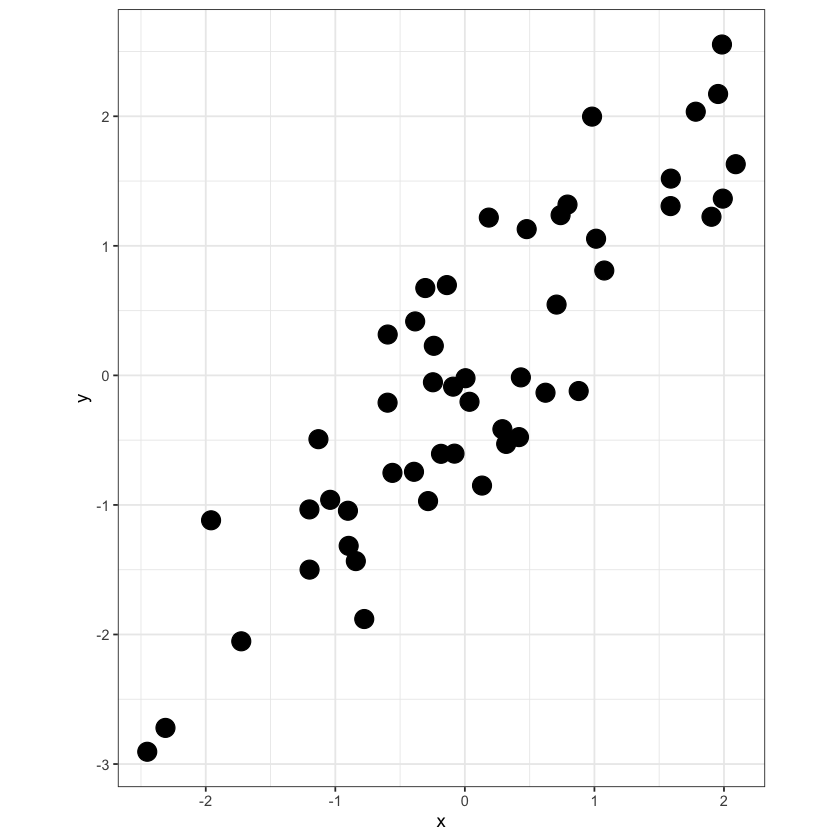

In [4]:
set.seed(2)
df <- data.frame(x = rnorm(50)) %>% 
  dplyr::mutate(y = x + rnorm(50, sd = 0.5))
ggplot(df, aes(x = x, y = y)) + coord_fixed() + geom_point(size = 5) + theme_bw()

Here we have two variables; $x$ and $y$. A linear combination of these two variables is a feature of the form $$z=ax+by$$for any numbers $a$ and $b$. For example, we can set $a=1, b=0$ to get $z=x$, or $a=b=1/2$ to get the average of $x$ and $y$. 

Calculating such a linear combination can be related to _projecting_ the points above onto a line through the origin in the two-dimensional space. For example, let's choose the line to be the x-axis. We define a vector of unit length, pointing in the direction of the x-axis, as $(1,0)$. Projecting any point $(x_i,y_i)$ onto this axis now amounts to calculating the dot product between $(1,0)$ and $(x_i,y_i)$, that is, $1\cdot x_i + 0\cdot y_i=x_i$. The interpretation of this is that along the axis defined by the direction $(1,0)$, the coordinate of the point $(x_i,y_i)$ (=the distance from the origin) is equal to $x_i$. This makes sense, since here we project onto the x-axis, and the coordinate of each point is indeed the x-coordinate of that point. We visualize the projection of one point below:

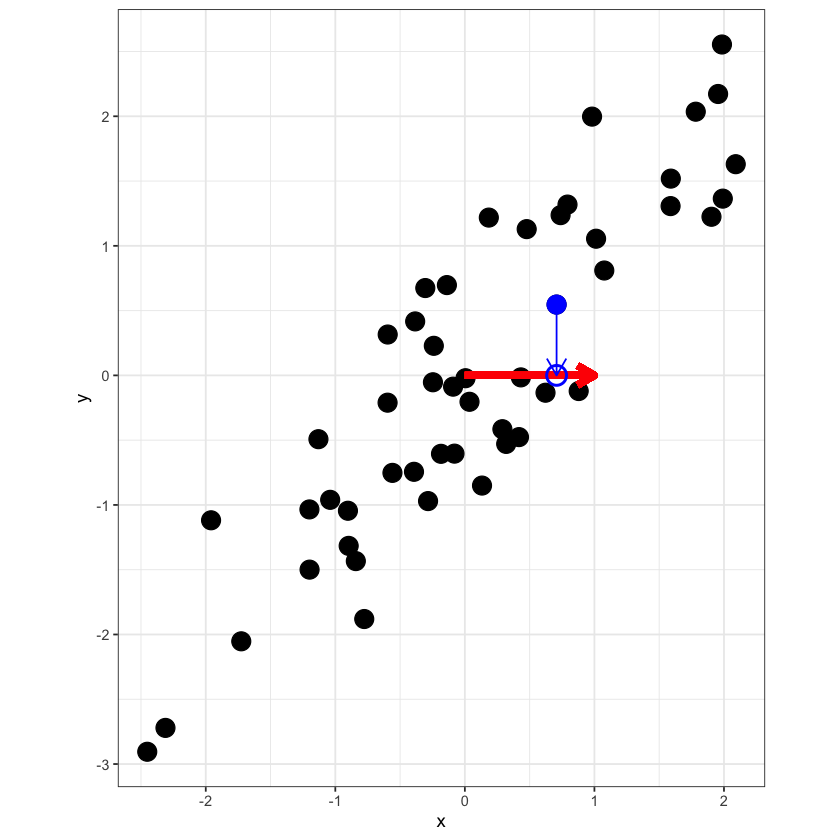

In [5]:
ggplot(df) + coord_fixed() + geom_point(aes(x = x, y = y), size = 5) + theme_bw() + 
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 0), 
               arrow = arrow(length = unit(0.03, "npc")), size = 2, color = "red") + 
  geom_point(data = df[7, ], aes(x = x, y = y), size = 5, color = "blue") + 
  geom_segment(data = df[7, ], aes(x = x, y = y, xend = x, yend = 0),
               arrow = arrow(length = unit(0.03, "npc")), color = "blue") + 
  geom_point(data = df[7, ], aes(x = x, y = 0), shape = 1, color = "blue", size = 4.75, stroke = 1.25)

Before moving on, we'll clarify one aspect that is often confusing. The dot product calculated above gave us the coordinate of a point along a given axis in the two-dimensional space. This is comparable to saying that for the point $(x_i,y_i)$ (in two dimensions), $x_i$ (a scalar value) is the coordinate along the $x$-axis, and $y_i$ (a scalar value) is the coordinate along the $y$-axis. Now, the actual projected _point_ (the hollow circle in the plot above) _still lives in the two-dimensional space_! The projected point is given by the coordinate ($x_i$) times the projection axis $(1, 0)$, that is, $(x_i, 0)$. The fact that projecting a data set onto an axis keeps it in the same ambient space is important, if we want to be able to compare the point cloud before and after the projection. However, we can now _choose_ to represent our points in a new, 1-dimensional space, where the $x$-axis is given by the projection axis. We can no longer compare the coordinates directly to the original ones (since the basis of the spaces are different), but now we have truly achieved dimension reduction, since the points are now represented in a space with fewer coordinate axes. 

Of course, we are not restricted to projecting onto coordinate axes. Let's take another example, and define the direction that we want to project onto as $$v=\left(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}\right).$$Now, the projected coordinate (__along the defined axis__) for a point $(x_i, y_i)$ is obtained as $$\frac{1}{\sqrt{2}}\cdot x_i + \frac{1}{\sqrt{2}}\cdot y_i.$$Denoting the $N\times 2$ matrix with original $x$- and $y$-coordinates by $M$ (the number of rows $N$ is the number of points), and considering $v$ as a $2\times 1$ column vector, we can compute the coordinates along the new axis by matrix multiplication:$$z=Mv$$(note that the components $(v_x, v_y)$ of $v$ were chosen such the the length of $v$, calculated as $\lvert v \rvert = \sqrt{{v_x}^2 + {v_y}^2}$ is 1. If $v$ is not a unit vector, we need to apply further scaling to get the coordinates `COMMENT_MICHAEL: I guess the projection would also work for other vectors than unit vectors; what is the advantage of using a unit vector as basis for the projection space? Maybe here you could add a sentence explaining this`). Let's see what this projection looks like for the data above.

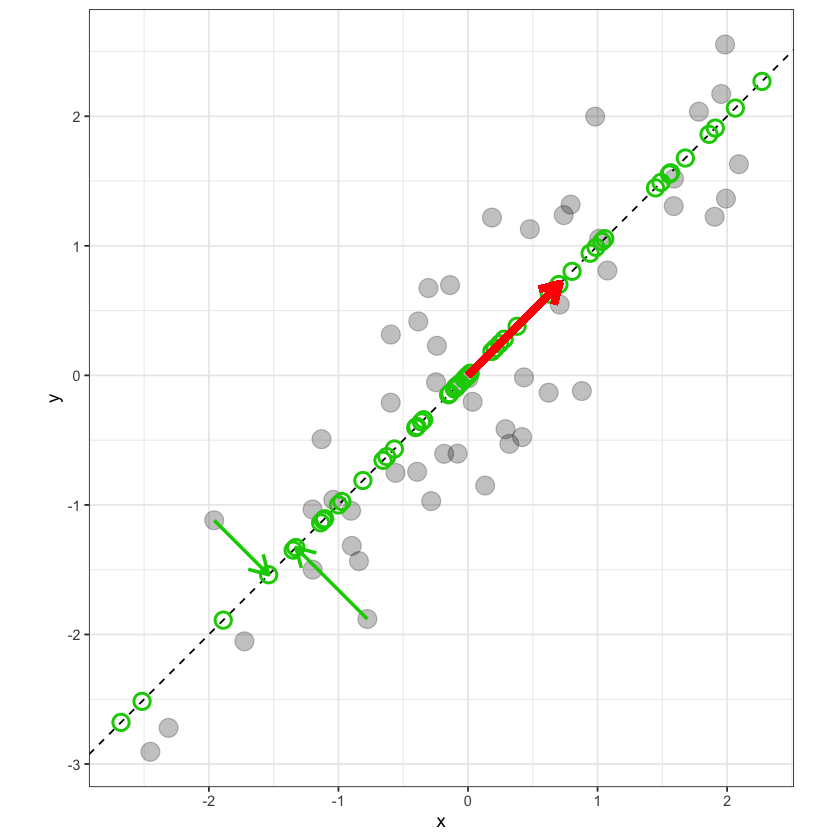

In [6]:
a <- b <- 1/sqrt(2)
v <- rbind(a, b)
df0 <- c(as.matrix(df) %*% v)
ggplot(df) + coord_fixed() + theme_bw() + 
  geom_point(aes(x = x, y = y), size = 5, alpha = 0.25) + 
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") + 
  geom_point(data = data.frame(x = df0 * a, y = df0 * b),
             aes(x = x, y = y), shape = 1, color = "green3", size = 3.75, stroke = 1.25) + 
  geom_segment(aes(x = 0, y = 0, xend = a, yend = a), 
               arrow = arrow(length = unit(0.03, "npc")), size = 2, color = "red") + 
  geom_segment(data = cbind(df, xend = df0 * a, yend = df0 * b)[c(35, 42), ],
               aes(x = x, y = y, xend = xend, yend = yend), 
               arrow = arrow(length = unit(0.03, "npc")), size = 1, color = "green3")

`COMMENT_MICHAEL: I have used open symbols for the projection points to reduce crowding - feel free to revert back if you don't like it!` As we can see, each original (grey) point has been projected onto the new axis (the dashed line, also represented by the red arrow of unit length), and the new coordinate along that axis (the distance from the origin) is given by a linear combination of the original coordinates (the projection of two example points is indicated by green arrows). By doing this projection, we have essentially reduced our original 2-dimensional data set to a 1-dimensional one, but incorporating information from both the original $x$ and $y$ in the process. We can see that we are still losing some information (the difference between the grey and green points). The two example points with the green projection arrows are well separated in the originial 2-dimensional space, but they are much closer on the 1-dimensional projection space. However, if we select the projection axis in a clever way, this loss is overall smaller than if we would simply select the $x$-coordinate as the one-dimensional representation of our points. 

We will see below that PCA performs precisely this type of projection (typically from a very high-dimensional space, but the principle is the same as in our two-dimensional example above), and the projection axis is chosen in such a way as to retain as much 'information' as possible from the original data set. 

### The Frobenius norm

Before going further, we define a way to calculate the 'size' of a matrix. The _Frobenius norm_ is a generalization of the Euclidean distance, and for an $N\times p$ matrix $M$ it's defined as $$\|M\|_F^2=\sum_{j=1}^p\sum_{i=1}^Nm_{ij}^2.$$In other words, the sum of the squared values of all matrix elements. We can use this to define a distance measure between two matrices of the same dimensions, as: $$d(M,W)=\|M-W\|_F.$$Let's define the two matrices as representing the original (grey) and projected (green) points in the plot above. Then, the squared Frobenius norm of the difference corresponds to the sum of the squared Euclidean distances from the original points to the projected points (the lengths of the green lines below). 

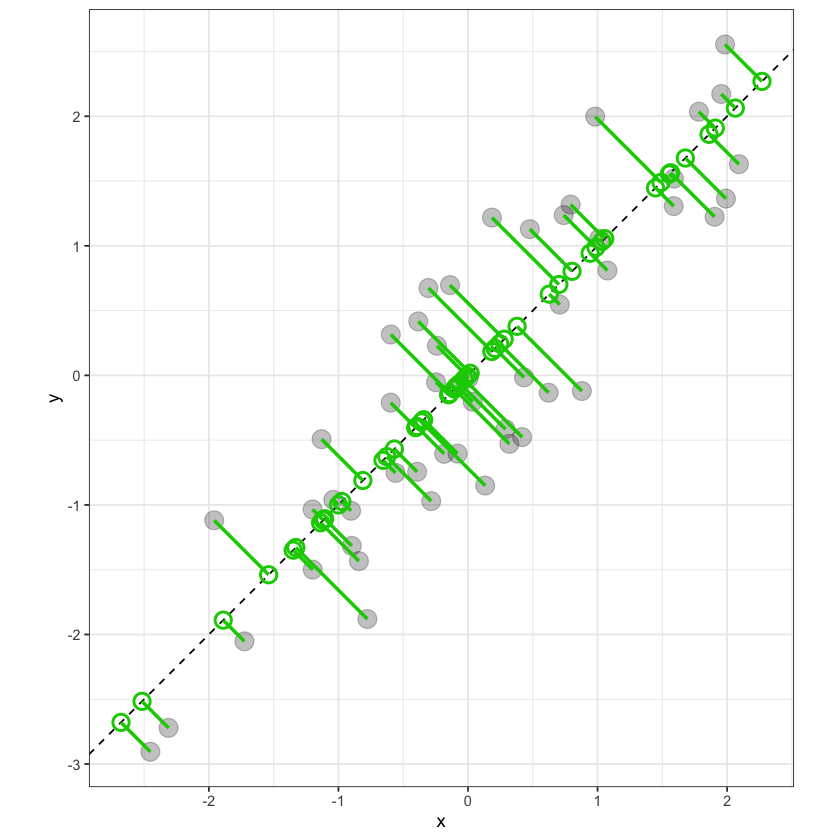

In [7]:
ggplot(df) + coord_fixed() + theme_bw() + 
  geom_point(aes(x = x, y = y), size = 5, alpha = 0.25) + 
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") + 
  geom_point(data = data.frame(x = df0 * a, y = df0 * b),
             aes(x = x, y = y), shape = 1, color = "green3", size = 3.75, stroke = 1.25) + 
  geom_segment(data = cbind(df, xend = df0 * a, yend = df0 * b),
               aes(x = x, y = y, xend = xend, yend = yend), 
               size = 1, color = "green3")

## The singular value decomposition (SVD)

Before showing how to perform a PCA on the `mtcars` data, we will look into the theoretical underpinnings a bit. First, we'll talk about the _singular value decomposition_ (_SVD_, sometimes also referred to as _compact SVD_, e.g. on [Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition)). This is an important mathematical result, which states that _every_ real-valued $N\times p$ matrix $M$ can be _decomposed_ as $$M=UDV^T,$$ where $U$ is an $N\times r$ orthogonal matrix (a matrix where each pair of columns are orthogonal, and the sum of the squared values in each column is equal to 1), $V$ is a $p\times r$ orthogonal matrix ($T$ represents the transpose of a matrix) and $D$ is a non-negative $r\times r$ diagonal matrix. Here, $r$ denotes the _rank_ of the matrix, which corresponds to the number of non-zero values in the diagonal of $D$. In fact, the decomposition exists also for complex-valued matrices, but we'll stay with the real-valued ones for this introduction. In this decomposition, the columns of $U$ and $V$ are called the left and right singular vectors, respectively, and the diagonal elements of $D$ are called the singular values. It is also worth noting that if all the singular values are unique, and we follow the convention of ordering them in decreasing order, the decomposition is uniquely determined (up to the sign of the singular vectors). 

To see how this works in practice, let's apply it to the `mtcars` matrix above. In R, the singular value decomposition can be calculated using the `svd()` function. 

In [8]:
svdres <- svd(as.matrix(mtcars))

In [9]:
str(svdres)

List of 3
 $ d: num [1:11] 1726.66 227.64 88.25 11.92 5.64 ...
 $ u: num [1:32, 1:11] -0.1132 -0.1132 -0.0825 -0.1616 -0.2313 ...
 $ v: num [1:11, 1:11] -0.0519 -0.0206 -0.8523 -0.5172 -0.0101 ...


We indeed get the expected three components ($U$, $V$, $D$) in the output. Let's first check that the $U$ and $V$ matrices are orthogonal. This can be done my calculating the dot product (scalar product) between each pair of columns. If the matrix is orthogonal, this product should be 1 if a column is multiplied with itself, and 0 otherwise. Practically, we can achieve this by performing a matrix multiplication between the transpose of the matrix and the matrix itself. The diagonal elements in the resulting matrix correspond to multiplication of a column by itself, and the off-diagonal elements correspond to multiplication of different columns. 

In [10]:
round(t(svdres$u) %*% svdres$u, 3)

1,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,1


In [11]:
round(t(svdres$v) %*% svdres$v, 3)

1,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,1


Just as we expected! We also confirm that the values in $D$ are all non-negative and ordered in decreasing order of magnitude (note that since we know that $D$ is a diagonal matrix, only the diagonal values are given here - to turn it into a matrix we can use the `diag()` function):

In [12]:
round(svdres$d, 1)

[1] 1726.7  227.6   88.2   11.9    5.6    4.2    2.6    1.6    1.4    1.2
[11]    1.1

Finally, we have to confirm that we have actually decomposed our original matrix! In other words, performing the matrix multiplication $UDV^T$ should return our original matrix.

In [13]:
mtcars_rec <- svdres$u %*% diag(svdres$d) %*% t(svdres$v)
max(abs(mtcars_rec - mtcars))

[1] 2.842171e-13

Success!

Now that we have seen that we can decompose our matrix using the SVD (I promise you, it will work for any other matrix as well), let's see how this is related to PCA. In fact, it is very straightforward: given a matrix $M$ with samples in the rows and variables in the columns, we define the _principal components_ by the columns of $V$. Relating back to what we saw in the beginning of this session, we can interpret each of these columns as a vector of _weights_, one for each variable, and we can create a linear combination of the original variables with precisely these weights. Recall that this would correspond to projecting the data onto a corresponding line in the original space. 

`COMMENT_MICHAEL: I love this part, but I could imagine that we loose some experimental people here who may not remember their linear algebra... I think that is ok, though (no reason to shorten this or leave it out)` Let's see what happens if we perform the projection of our original data matrix $M$ onto these components. As indicated above, this would be achieved by matrix multiplication of $M$ and $V$. Since $V$ is an orthogonal matrix, we get the projections as $$MV=UDV^TV=UD.$$ In other words, the projections of the original samples onto the new orthogonal basis defined by the principal components are given by the rows of $UD$.

Let's take a step back and look at what we have achieved: we have _decomposed_ $M$, using the SVD, into $$M=(UD)V^T,$$where $V$ contains the principal components and $UD$ contains the projections of each original point onto these principal components. But what is this all good for - remember that what we are after is to reduce the dimensionality of the data, while in some sense keeping as much information as possible. The answer lies in the _Eckart-Young_ theorem: 

__Eckart-Young theorem__: Let M be a real $N\times p$ matrix with rank r, and let $s\leq r$. Then the optimal rank-s approximation to $M$ (minimizing the Frobenius norm of the difference) is given by $$M_s=U_sD_sV_s^T,$$ where $U_s$ and $V_s$ are matrices containing the first $s$ left and right singular vectors of $M$, respectively, and $D_s$ is a diagonal matrix containing the first $s$ singular values. The error in the approximation is given by $$\|M-M_s\|_F^2=\sum_{k=s+1}^rd_k^2.$$

In other words, performing the SVD and keeping only the first $s$ columns of the respective matrices gives us the _best_ $s$-dimensional approximation of our original matrix, which was exactly what we were after! Note also that by choosing $s=r$, we get back our original matrix, as we saw previously. Furthermore, the singular values (elements of $D$) are a measure of how important each new dimension is for the reconstruction of the original $M$.

Let's try what we just saw in practice. Given our `mtcars` matrix $M$, we approximate it with the first 6 singular vectors, and calculate the error. 

In [14]:
## Get U, D, V via SVD
mtcars_svd <- svd(as.matrix(mtcars))

## Calculate M_s, with s=6
mtcars_s6 <- mtcars_svd$u[, 1:6] %*% diag(mtcars_svd$d[1:6]) %*% t(mtcars_svd$v[, 1:6])
dim(mtcars_s6) ## same as mtcars

[1] 32 11

In [15]:
## Calculate the Frobenius norm of the difference between the two matrices (M and M_s)
sum((mtcars - mtcars_s6)^2)

[1] 13.865

In [16]:
## Compare it to the sum of the squared singular values for the components that are not included
sum(mtcars_svd$d[7:11]^2)

[1] 13.865

As expected, the error in the approximation is exactly given by the sum of the squares of the non-included singular values!

To recap, at this point we have a decomposition of the original matrix, which is such that if we select a pre-defined number of components from it, we get the best approximation of the original matrix of that rank, and where we can interpret $UD$ as the projection of the original matrix onto the orthogonal columns of $V$. Sounds pretty good! But it doesn't stop there. Let's make one more assumption, namely that the columns of our original matrix are centered (in other words, that the mean of each variable is 0). In that case, we can prove that the projection onto the first $s$ right singular vectors is also the rank-$s$ projection with maximal _variance_. In other words, if we consider variance a good measure of "information", the first $s$ principal components provides the most informative rank-$s$ projection of our data! We can easily get the variance explained by each component as the square of the corresponding singular value. 

In fact, we can also prove that the projecting the data onto the first principal components is optimal in the sense of preserving distances, that is, minimizing $$\sum_{j,k=1}^n\delta_{jk}^2-\hat{\delta}_{jk}^2$$where $\delta_{jk}$ and $\hat{\delta}_{jk}$ are Euclidean distances between points $j$ and $k$ in the original and low-dimensional space, respectively. 

## Running PCA in R

Hopefully the derivations above have convinced you that projecting data onto the first principal components can be a sensible way of reducing the dimensionality while retaining as much as possible of the 'information' (=variance) in the original data, or, alternatively, to approximate the original data as well as possible in a lower-dimensional space. Now, we will see how to run the PCA in R. We can of course do it with the `svd()` function as described above, but R has also other functions that perform a bit more of the legwork for us. The one we are going to use here is `prcomp()`, which is provided in base R. Internally, it makes use of the SVD, which can be efficiently and robustly computed. This makes it numerically preferable to the `princomp()` function (also in base R), which uses an eigendecomposition to find the principal components. 

__Important!__ When applying `prcomp()` to your data, make sure that you have the __samples in the rows__, and the variables in the columns! This is counter to most of the omics data, but keep in mind that `prcomp()` was written before omics data, during the time when data sets typically had more samples than variables, in which case this was the typical way of representing the data matrix. 

The most important argument of `prcomp()` is the data matrix itself. In addition, we can specify whether the variables should be centered (`center` argument) and/or scaled (`scale.` argument) before the SVD is performed. We almost always want to set `center=TRUE`, which is the default in `prcomp()`; note that if we don't center the variables we can no longer interpret the square of the singular values as variances (they will merely be sums of squares). We will discuss the `scale.` argument a bit later - whether you want to scale your variables or not can depend strongly on your data and can have a non-negligible impact on the results. 

Let's start by performing PCA on the `mtcars` data, without scaling the variables:

In [17]:
pca <- prcomp(mtcars, scale. = FALSE)

The `pca` object contains all the output we need:
* `x` - the sample coordinates on each of the principal components
* `rotation` - the variable contributions (weights, loadings) to each of the principal components
* `sdev` - the singular values, that is, the square roots of the variances of the respective components
* `center`, `scale` - the values used to center and/or scale the variables before the SVD

In [18]:
str(pca)

List of 5
 $ sdev    : num [1:11] 136.533 38.148 3.071 1.307 0.906 ...
 $ rotation: num [1:11, 1:11] -0.03812 0.01204 0.89957 0.43478 -0.00266 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "mpg" "cyl" "disp" "hp" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 20.09 6.19 230.72 146.69 3.6 ...
  ..- attr(*, "names")= chr [1:11] "mpg" "cyl" "disp" "hp" ...
 $ scale   : logi FALSE
 $ x       : num [1:32, 1:11] -79.6 -79.6 -133.89 8.52 128.69 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


Before interpreting the results further, let's make sure that we understand the relationship to the SVD.

In [19]:
## Center the data set
mtcars_centered <- scale(mtcars, center = TRUE, scale = FALSE)

## Apply SVD
mtcars_svd <- svd(mtcars_centered)

## Compare V to rotation
max(abs(mtcars_svd$v) - abs(pca$rotation))
head(mtcars_svd$v)
head(pca$rotation)

[1] 0

-0.038118199,0.009184847,0.98207085,0.047634784,-0.08832843,-0.143790084,-0.039239174,2.271040e-02,-0.002790139,0.030630361,-0.0158569365
0.012035150,-0.003372487,-0.06348394,-0.227991962,0.23872590,-0.793818050,0.425011021,-1.890403e-01,0.042677206,0.131718534,0.1454453628
0.899568146,0.435372320,0.03144266,-0.005086826,-0.01073597,0.007424138,0.000582398,-5.841464e-04,0.003532713,-0.005399132,0.0009420262
0.434784387,-0.899307303,0.02509305,0.035715638,0.01655194,0.001653685,-0.002212538,4.748087e-06,-0.003734085,0.001862554,-0.0021526102
-0.002660077,-0.003900205,0.03972493,-0.057129357,-0.13332765,0.227229260,0.034847411,-9.385817e-01,-0.014131110,0.184102094,-0.0973818815
0.006239405,0.004861023,-0.08491026,0.127962867,-0.24354296,-0.127142296,-0.186558915,1.561907e-01,-0.390600261,0.829886844,-0.0198581635


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
mpg,-0.038118199,0.009184847,0.98207085,0.047634784,-0.08832843,-0.143790084,-0.039239174,2.271040e-02,-0.002790139,0.030630361,-0.0158569365
cyl,0.012035150,-0.003372487,-0.06348394,-0.227991962,0.23872590,-0.793818050,0.425011021,-1.890403e-01,0.042677206,0.131718534,0.1454453628
disp,0.899568146,0.435372320,0.03144266,-0.005086826,-0.01073597,0.007424138,0.000582398,-5.841464e-04,0.003532713,-0.005399132,0.0009420262
hp,0.434784387,-0.899307303,0.02509305,0.035715638,0.01655194,0.001653685,-0.002212538,4.748087e-06,-0.003734085,0.001862554,-0.0021526102
drat,-0.002660077,-0.003900205,0.03972493,-0.057129357,-0.13332765,0.227229260,0.034847411,-9.385817e-01,-0.014131110,0.184102094,-0.0973818815
wt,0.006239405,0.004861023,-0.08491026,0.127962867,-0.24354296,-0.127142296,-0.186558915,1.561907e-01,-0.390600261,0.829886844,-0.0198581635


In [20]:
## Compare UD to x
max(abs(mtcars_svd$u %*% diag(mtcars_svd$d)) - abs(pca$x))
head(mtcars_svd$u %*% diag(mtcars_svd$d))
head(pca$x)

[1] 1.421085e-13

-79.596425,2.132241,-2.153336,-2.7073437,-0.7023522,-0.31486106,-0.098695018,-0.07789812,-0.2000092,-0.29008191,0.1057706
-79.598570,2.147487,-2.215124,-2.1782888,-0.8843859,-0.45343873,-0.003554594,-0.09566630,-0.3533243,-0.19283553,0.1069047
-133.894096,-5.057570,-2.137950,0.3460330,1.1061111,1.17298584,0.005755581,0.13624782,-0.1976423,0.07634353,0.2668713
8.516559,44.985630,1.233763,0.8273631,0.4240145,-0.05789705,-0.024307168,0.22120800,0.3559844,-0.09057039,0.2088354
128.686342,30.817402,3.343421,-0.5211000,0.7365801,-0.33290957,0.106304777,-0.05301719,0.1532714,-0.18862217,-0.1092563
-23.220146,35.106518,-3.259562,1.4005360,0.8029768,-0.08837864,0.238946304,0.42390551,0.1012944,-0.03769010,0.2757693


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Mazda RX4,-79.596425,2.132241,-2.153336,-2.7073437,-0.7023522,-0.31486106,-0.098695018,-0.07789812,-0.2000092,-0.29008191,0.1057706
Mazda RX4 Wag,-79.598570,2.147487,-2.215124,-2.1782888,-0.8843859,-0.45343873,-0.003554594,-0.09566630,-0.3533243,-0.19283553,0.1069047
Datsun 710,-133.894096,-5.057570,-2.137950,0.3460330,1.1061111,1.17298584,0.005755581,0.13624782,-0.1976423,0.07634353,0.2668713
Hornet 4 Drive,8.516559,44.985630,1.233763,0.8273631,0.4240145,-0.05789705,-0.024307168,0.22120800,0.3559844,-0.09057039,0.2088354
Hornet Sportabout,128.686342,30.817402,3.343421,-0.5211000,0.7365801,-0.33290957,0.106304777,-0.05301719,0.1532714,-0.18862217,-0.1092563
Valiant,-23.220146,35.106518,-3.259562,1.4005360,0.8029768,-0.08837864,0.238946304,0.42390551,0.1012944,-0.03769010,0.2757693


In [21]:
## Compare D to sdev
mtcars_svd$d  ## these are not actual standard deviation, but a constant multiple of them
mtcars_svd$d/sqrt(32 - 1)
pca$sdev
mtcars_svd$d^2/pca$sdev^2

[1] 760.183838 212.399507  17.098697   7.275124   5.047101   3.694440
 [7]   1.718096   1.592160   1.395823   1.172860   1.104777

[1] 136.5330479  38.1480776   3.0710166   1.3066508   0.9064862   0.6635411
 [7]   0.3085791   0.2859604   0.2506973   0.2106519   0.1984238

[1] 136.5330479  38.1480776   3.0710166   1.3066508   0.9064862   0.6635411
 [7]   0.3085791   0.2859604   0.2506973   0.2106519   0.1984238

[1] 31 31 31 31 31 31 31 31 31 31 31

Hopefully it is clear from these comparisons how SVD is used to power PCA, and how using the `prcomp()` function rather than the `svd()` function directly can help us take care of some of the book-keeping. 

The `prcomp()` output also has a helpful `summary()` function, that tabulates the standard deviation of each component, and the corresponding fraction of the total variance in the data set.

In [22]:
summary(pca)

Importance of components:
                           PC1      PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     136.533 38.14808 3.07102 1.30665 0.90649 0.66354 0.3086
Proportion of Variance   0.927  0.07237 0.00047 0.00008 0.00004 0.00002 0.0000
Cumulative Proportion    0.927  0.99937 0.99984 0.99992 0.99996 0.99998 1.0000
                         PC8    PC9   PC10   PC11
Standard deviation     0.286 0.2507 0.2107 0.1984
Proportion of Variance 0.000 0.0000 0.0000 0.0000
Cumulative Proportion  1.000 1.0000 1.0000 1.0000

We note that the first principal component represents almost _all_ the variance in the data (92.7%), and the second one adds a bit more. Components 3-11 contain almost no 'information', which indicates that seen like this, the data set is essentially two-dimensional. It is common to visualize the relative variance encoded by each component with a so called 'scree plot':

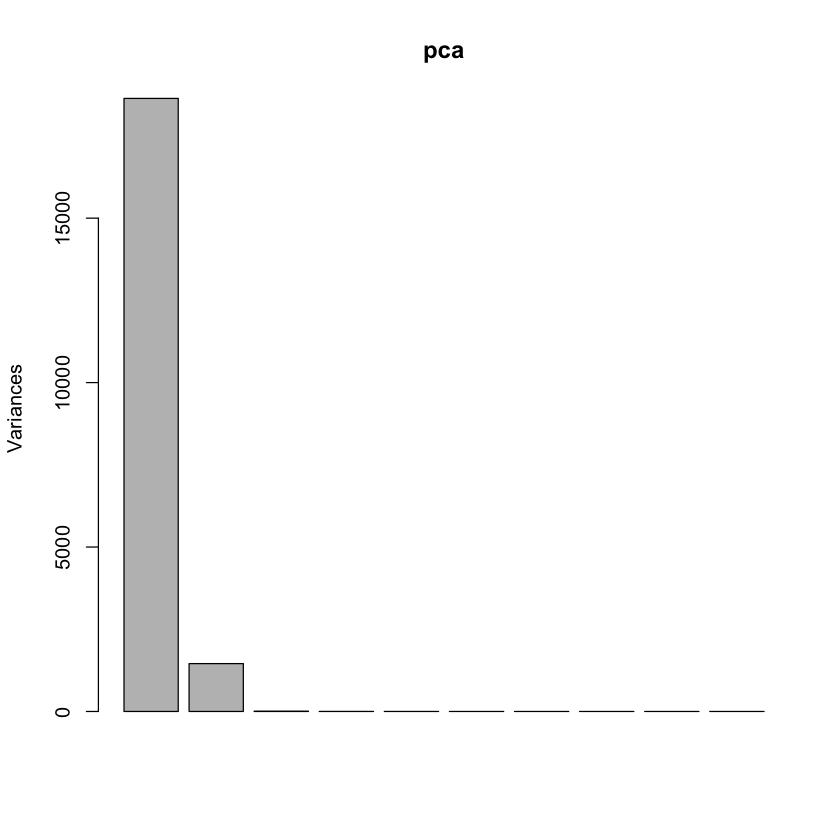

In [23]:
plot(pca)

Again, we see that the first two components represent more or less all the variance in this data set. Depending on why the PCA was performed, scree plots can be used to 
* determine how many principal components to retain (useful e.g. if PCA is used for preprocessing the data in order to generate a smaller number of uncorrelated features to use for input into other analysis methods such a linear regression or classification models)
* determine what fraction of the variance is determined by the first few components (useful if PCA is used for visualization, in which case the number of components is limited by practical limits but we still want to know how well we are approximating the original data)

To see how these components can be interpreted, let's first look at the sample representation. Here, we display the sample coordinates ($UD$, which we saw corresponds to `pca$x`) for the first two components, and color the points by the value of the `disp` variable:

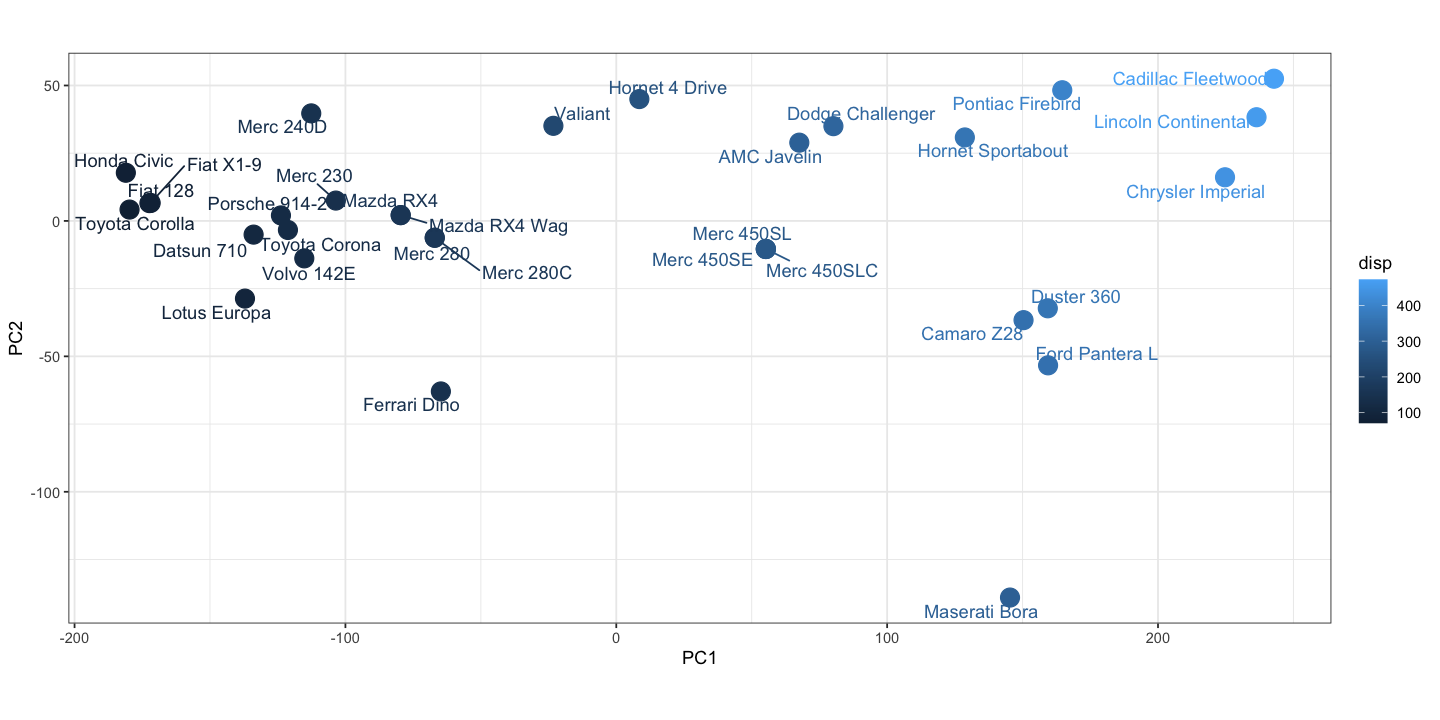

In [24]:
options(repr.plot.width = 12, repr.plot.height = 6) # default is 7, 7
ggplot(cbind(data.frame(pca$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = disp, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel() + coord_fixed()

Let's also look at the contributions from each of the variables to each of the principal components (i.e., $V$). We can do this either by printing out the `rotation` matrix, or by plotting the contributions to the first two components. Note that by construction (remember that $V$ is an orthogonal matrix), the sum of the squares of the weights in each component always sums to 1.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
mpg,-0.038,0.009,0.982,0.048,-0.088,-0.144,-0.039,0.023,-0.003,0.031,-0.016
cyl,0.012,-0.003,-0.063,-0.228,0.239,-0.794,0.425,-0.189,0.043,0.132,0.145
disp,0.900,0.435,0.031,-0.005,-0.011,0.007,0.001,-0.001,0.004,-0.005,0.001
hp,0.435,-0.899,0.025,0.036,0.017,0.002,-0.002,0.000,-0.004,0.002,-0.002
drat,-0.003,-0.004,0.040,-0.057,-0.133,0.227,0.035,-0.939,-0.014,0.184,-0.097
wt,0.006,0.005,-0.085,0.128,-0.244,-0.127,-0.187,0.156,-0.391,0.830,-0.020
qsec,-0.007,0.025,-0.072,0.886,-0.214,-0.190,0.255,-0.103,-0.096,-0.204,0.011
vs,-0.003,0.002,0.004,0.177,-0.017,0.103,-0.081,-0.002,0.684,0.303,0.626
am,-0.002,-0.006,0.055,-0.136,-0.063,0.205,0.201,-0.023,-0.572,-0.163,0.733
gear,-0.003,-0.011,0.049,-0.130,-0.276,0.335,0.802,0.217,0.156,0.204,-0.191


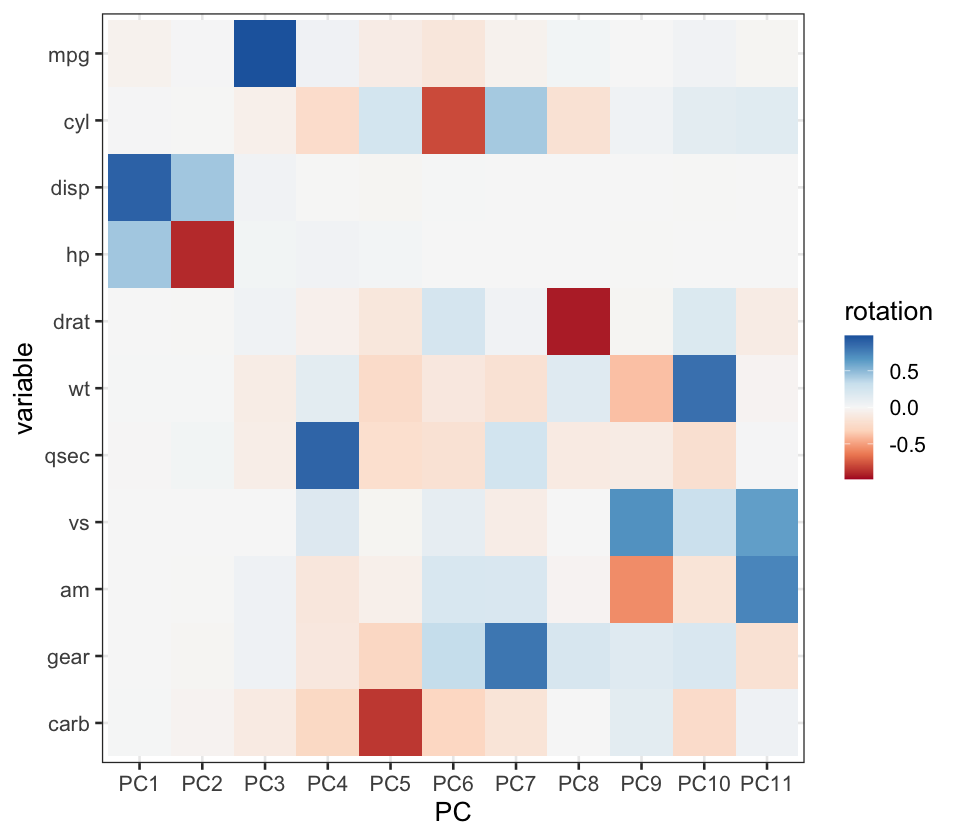

In [25]:
round(pca$rotation, 3)
# visualize as heatmap
options(repr.plot.width = 8, repr.plot.height = 7) # default is 7, 7
dn <- dimnames(pca$rotation)
df1 <- cbind(expand.grid(variable = factor(dn[[1]], levels = rev(dn[[1]])),
                         PC = factor(dn[[2]], levels = dn[[2]])),
             rotation = as.vector(pca$rotation))
mx <- max(abs(pca$rotation))
ggplot(df1, aes(x = PC, y = variable, fill = rotation)) +
    scale_fill_distiller(type = "div", palette = "RdBu", direction = 1, limits = c(-mx, mx)) +
    geom_tile() + theme_bw(16)

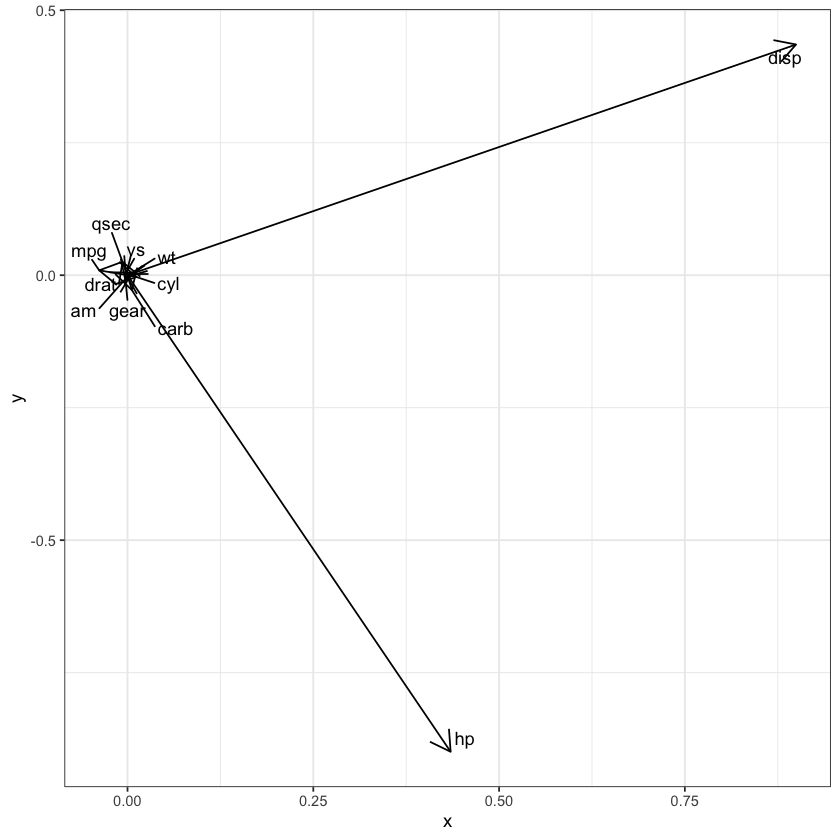

In [26]:
options(repr.plot.width = 7, repr.plot.height = 7) # default is 7, 7
ggplot(data.frame(pca$rotation) %>% tibble::rownames_to_column("feature")) + 
  geom_segment(aes(xend = PC1, yend = PC2, x = 0, y = 0),
               arrow = arrow(length = unit(0.03, "npc"))) + 
  theme_bw() + 
  geom_text_repel(aes(x = PC1, y = PC2, label = feature))

From this plot we note that two variables (`disp` and `hp`) have _much_ higher contributions to the first and second principal components than the other variables do. Essentially, the value of these variables alone determine the coordinate of each sample on these components. Why is that? Let's look at the variances of the original variables:

In [27]:
round(apply(mtcars, 2, var), 1)

mpg     cyl    disp      hp    drat      wt    qsec      vs      am    gear 
   36.3     3.2 15360.8  4700.9     0.3     1.0     3.2     0.3     0.2     0.5 
   carb 
    2.6

The `disp` and `hp` variables have way higher variances than the other variables. Why is this important? Recall that we are essentially trying to distribute the weights between the variables (while keeping the sum of squared weights equal to 1) in such a way that the resulting weighted sum has maximal variance. Thus, if one variable has much higher variance than all others, the maximal variance of the linear combination is obtained by giving all the weight to that variable! In some situations, this may be desirable (e.g., when the high variance of a variable actually means that it is more important for us). One example where this is the case would be if the variables are all similar (e.g. blood pressure measurements at different time points) and thus directly numerically comparable.

However, in the current case, the reason for the high variance of `disp` and `hp` is rather that they are measured in different units than the other variables, not that they are more important (as a comparison, height doesn't become more important just because you measure it in centimeters instead of in meters, but the variance invariably increases by a factor of 10000). This is where the scaling comes in (the `scale.` argument of `prcomp`). If we set this to `TRUE`, all variables will be scaled to have the same variance before the SVD is applied, and thus the original variance will have no influence anymore. Instead, the _correlation_ among variables will become important. We can increase the variance of a linear combination by assigning higher weights to highly correlated variables. Let's see what happens if we do that:

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5707 1.6280 0.79196 0.51923 0.47271 0.46000 0.3678
Proportion of Variance 0.6008 0.2409 0.05702 0.02451 0.02031 0.01924 0.0123
Cumulative Proportion  0.6008 0.8417 0.89873 0.92324 0.94356 0.96279 0.9751
                           PC8    PC9    PC10   PC11
Standard deviation     0.35057 0.2776 0.22811 0.1485
Proportion of Variance 0.01117 0.0070 0.00473 0.0020
Cumulative Proportion  0.98626 0.9933 0.99800 1.0000

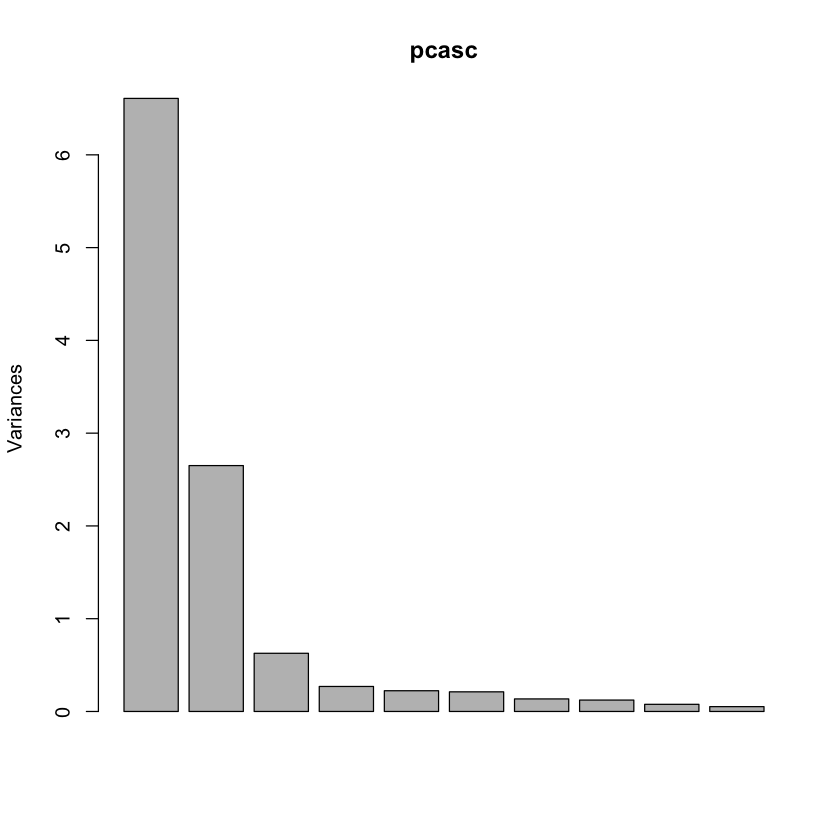

In [28]:
pcasc <- prcomp(mtcars, scale. = TRUE)
summary(pcasc)
plot(pcasc)

Now, while still a large fraction of the variance is explained by the first two components, it is nowhere near as dominant as before. 

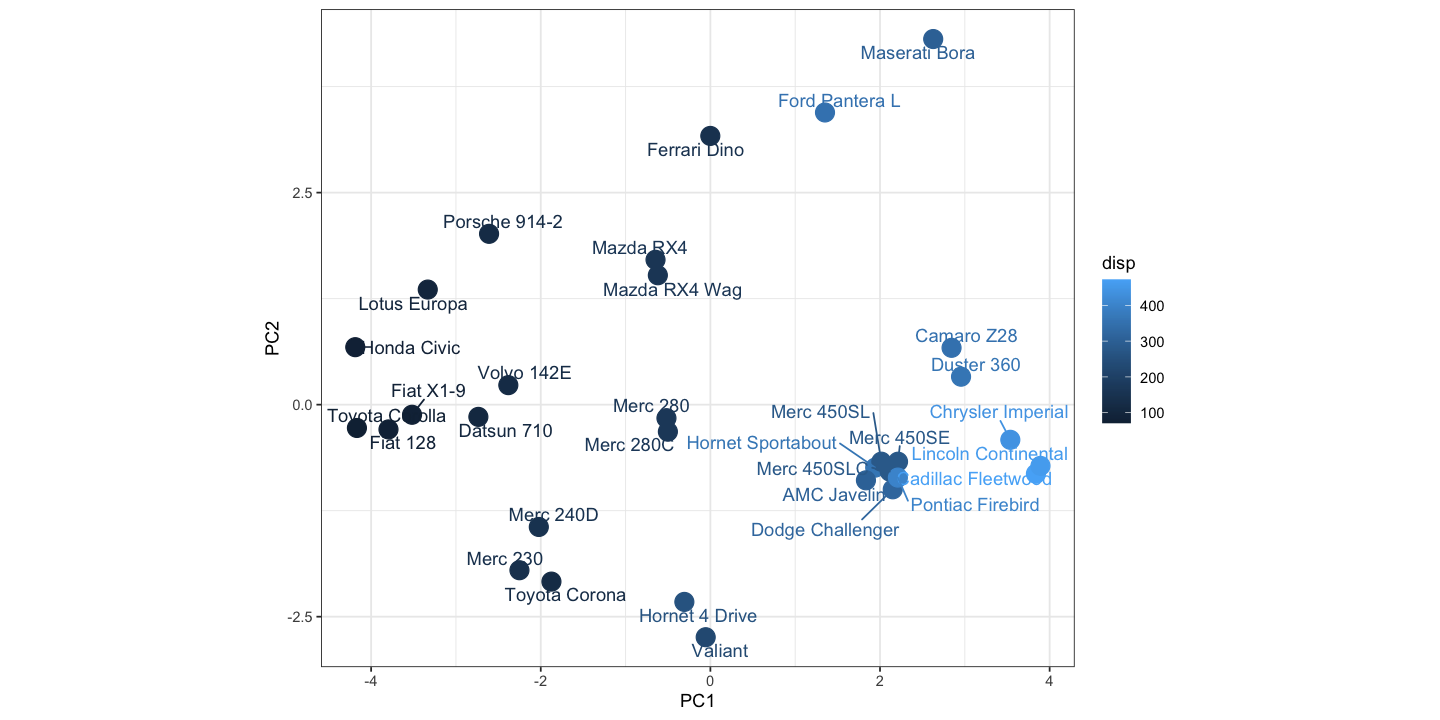

In [29]:
options(repr.plot.width = 12, repr.plot.height = 6) # default is 7, 7
ggplot(cbind(data.frame(pcasc$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = disp, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel() + coord_fixed()

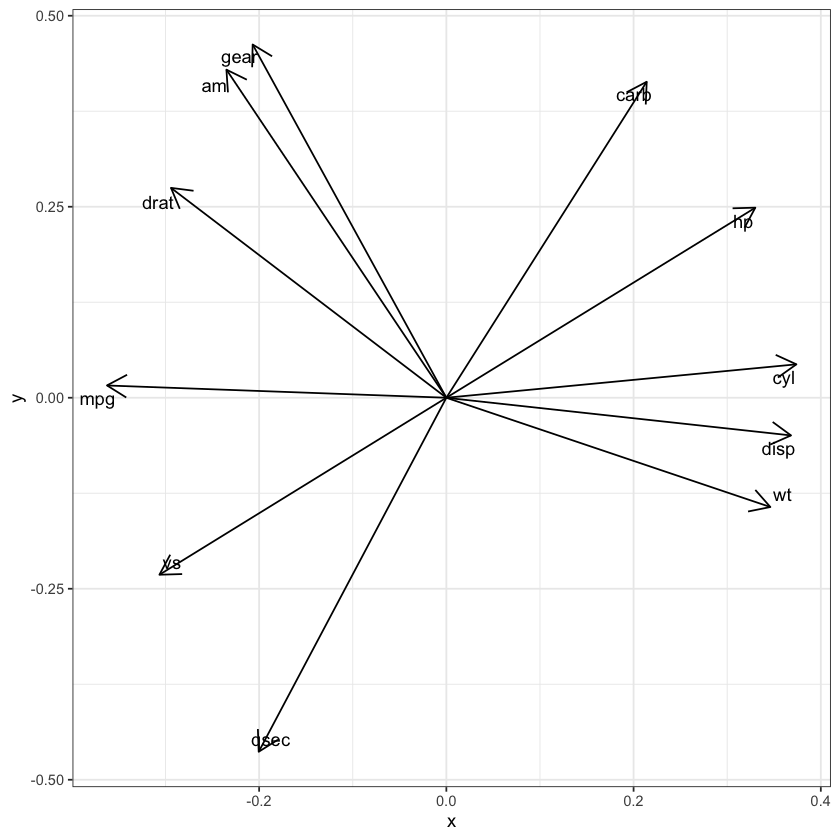

In [30]:
options(repr.plot.width = 7, repr.plot.height = 7) # default is 7, 7
ggplot(data.frame(pcasc$rotation) %>% tibble::rownames_to_column("feature")) + 
  geom_segment(aes(xend = PC1, yend = PC2, x = 0, y = 0),
               arrow = arrow(length = unit(0.03, "npc"))) + 
  theme_bw() + 
  geom_text_repel(aes(x = PC1, y = PC2, label = feature))

Now, many more variables contribute to the first principal components:

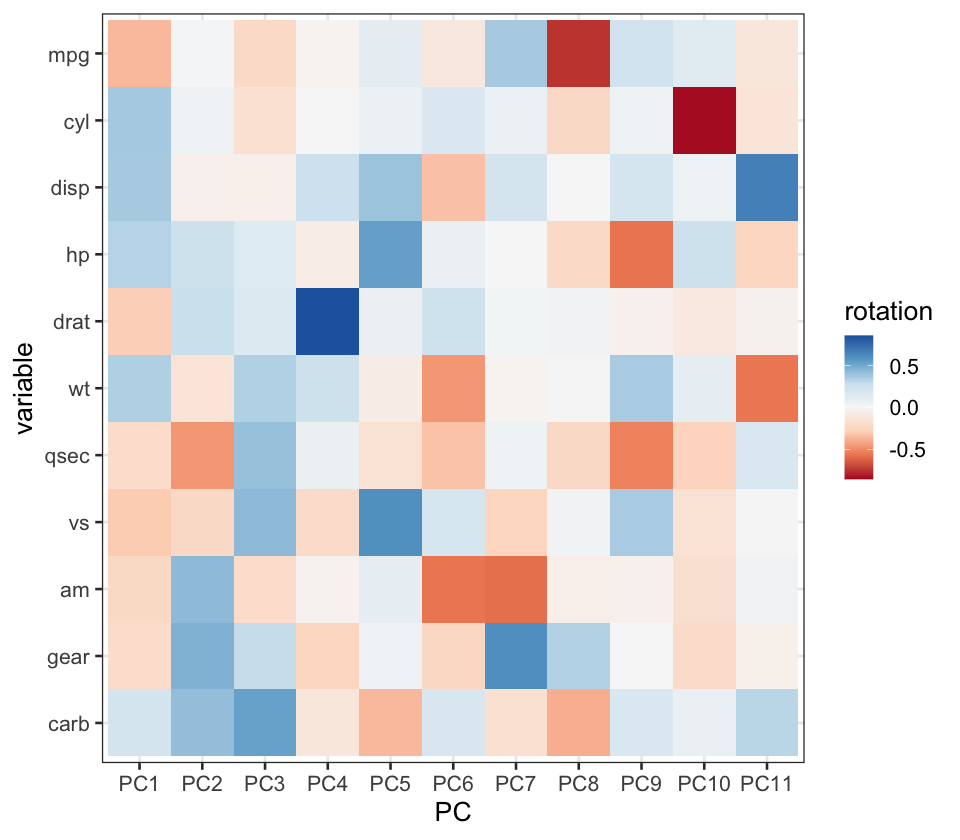

In [31]:
options(repr.plot.width = 8, repr.plot.height = 7) # default is 7, 7
dn <- dimnames(pcasc$rotation)
df2 <- cbind(expand.grid(variable = factor(dn[[1]], levels = rev(dn[[1]])),
                         PC = factor(dn[[2]], levels = dn[[2]])),
             rotation = as.vector(pcasc$rotation))
mx <- max(abs(pcasc$rotation))
ggplot(df2, aes(x = PC, y = variable, fill = rotation)) +
    scale_fill_distiller(type = "div", palette = "RdBu", direction = 1, limits = c(-mx, mx)) +
    geom_tile() + theme_bw(16)

Interestingly, we see two 'groups' of variables, defined by whether they have a positive or a negative contribution to the first principal component. Let's compare this division to the correlogram we made earlier:

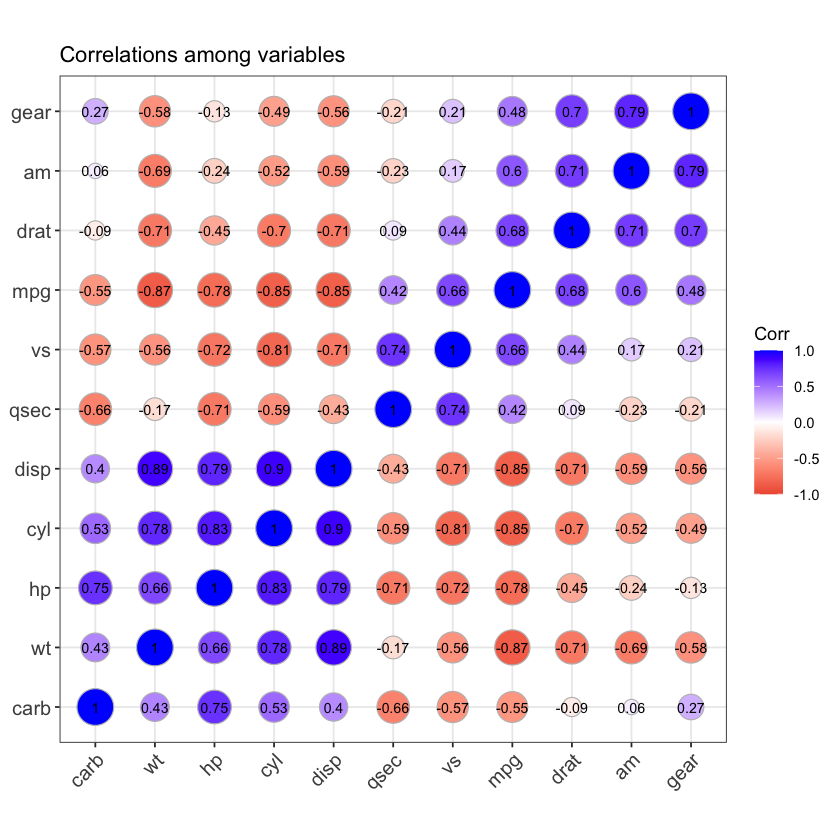

In [32]:
options(repr.plot.width = 7, repr.plot.height = 7) # default is 7, 7
ggcorrplot(round(cor(mtcars),3), 
           hc.order = TRUE, 
           lab = TRUE, 
           lab_size = 3, 
           method = "circle", 
           colors = c("tomato2", "white", "blue"), 
           title = "Correlations among variables", 
           ggtheme = theme_bw)

Pretty similar patterns emerge! The five variables with a positive contribution to PC1 (`disp`, `cyl`, `hp`, `wt`, `carb`) are also hiighly positively correlated with each other, and the same is true for the variables with a negative contribution to PC1. This is typical, and in fact one reason why PCA works so well for dimensionality reduction - highly correlated variables, which don't really add much independent information, are 'clumped together' in the sense that they give similar contributions to the principal components. Thus, instead of considering each of the highly correlated variables independently, we are effectively reducing them to their average. 

What else can we see from these plot? Let's consider the variable with the highest positive weight on PC1 (`cyl`). The fact that it has a high weight in the linear combination that is PC1 means that the sample coordinates on PC1 will be strongly impacted by their value of `cyl`. As a consequence, we would expect the value of `cyl` to be strongly associated with the position of the samples along PC1. Let's color the points by `cyl` to see whether this is correct: 

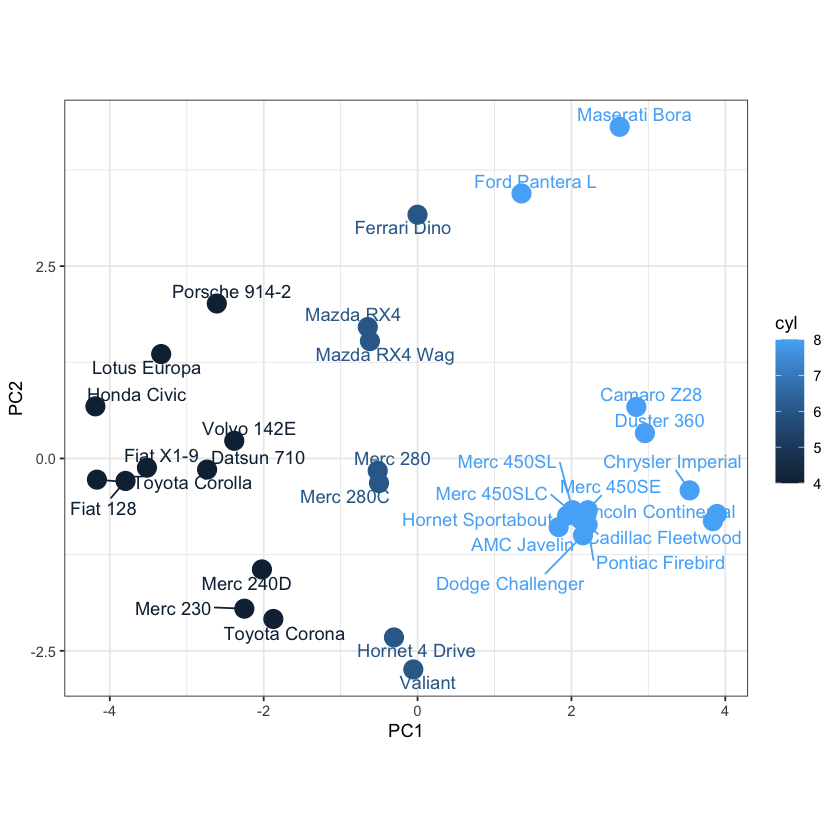

In [33]:
ggplot(cbind(data.frame(pcasc$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = cyl, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel() + coord_fixed()

Indeed it is! Moreover, the value of `cyl` is high in the samples with a positive coordinate on PC1. Let's similarly look at the variable with the largest _negative_ weight on PC1 (`mpg`). This similarly indicates that it has a strong impact on the sample coordinate on this component, but the effect is oppositely directed compared to `cyl`. Let's color the samples by the value of `mpg`:

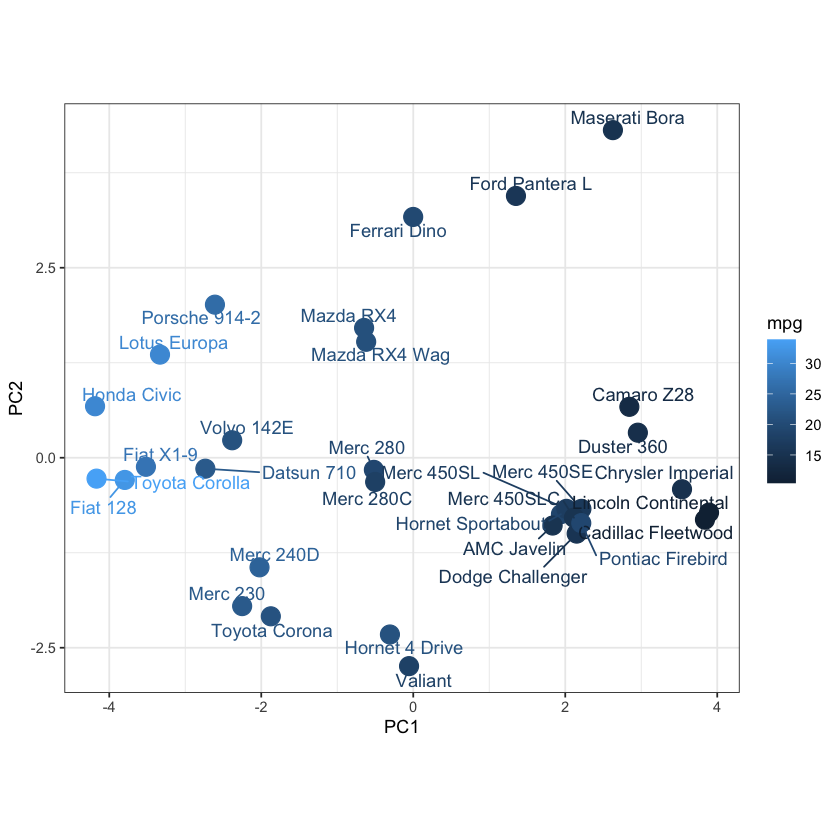

In [34]:
ggplot(cbind(data.frame(pcasc$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = mpg, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel() + coord_fixed()

This association between the weights of the variables in the principal components and their values in the samples with large (positive or negative) coordinates in the corresponding components is important, and can be very helpful for interpreting PCA plots. Take-home message: don't just look at the sample plot!

Above we looked at the contributions to the first principal component, but we can of course also look at any other component. For example, let's color the samples by the value of the variable with the largest negative contribution to PC2 (`qsec`): 

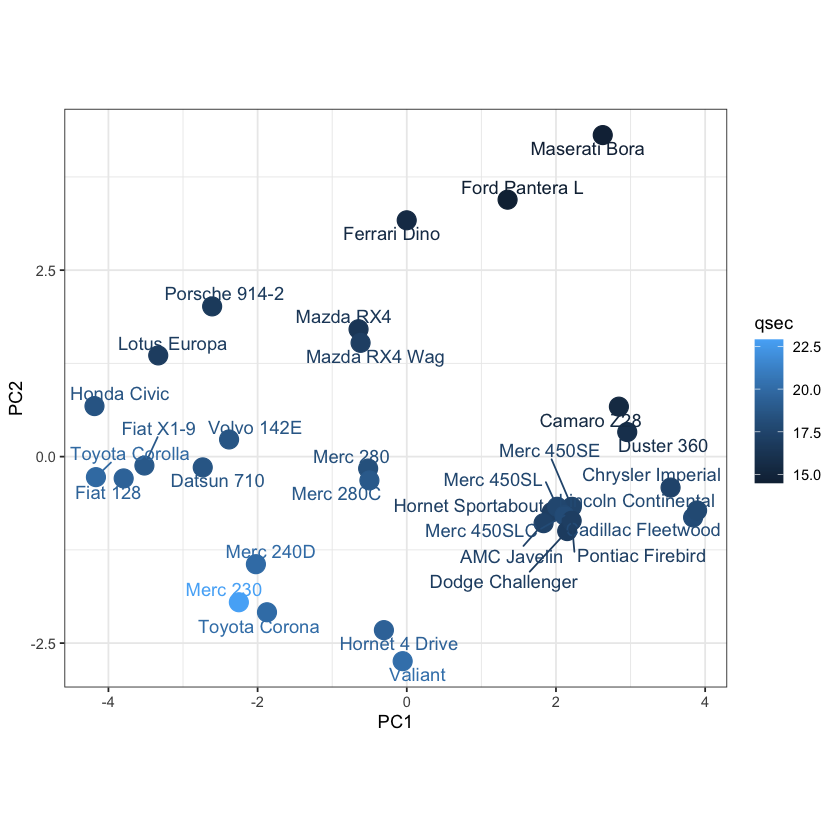

In [35]:
ggplot(cbind(data.frame(pcasc$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = qsec, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel() + coord_fixed()

Or let's consider a direction which is not parallel to one of the actual components - e.g., pointing towards the top-left corner of the plot (the `am` or `gear` variables). Samples located in the same direction tend to have a high value of that variable, and samples located in the opposite direction from the origin tend to have a low value.

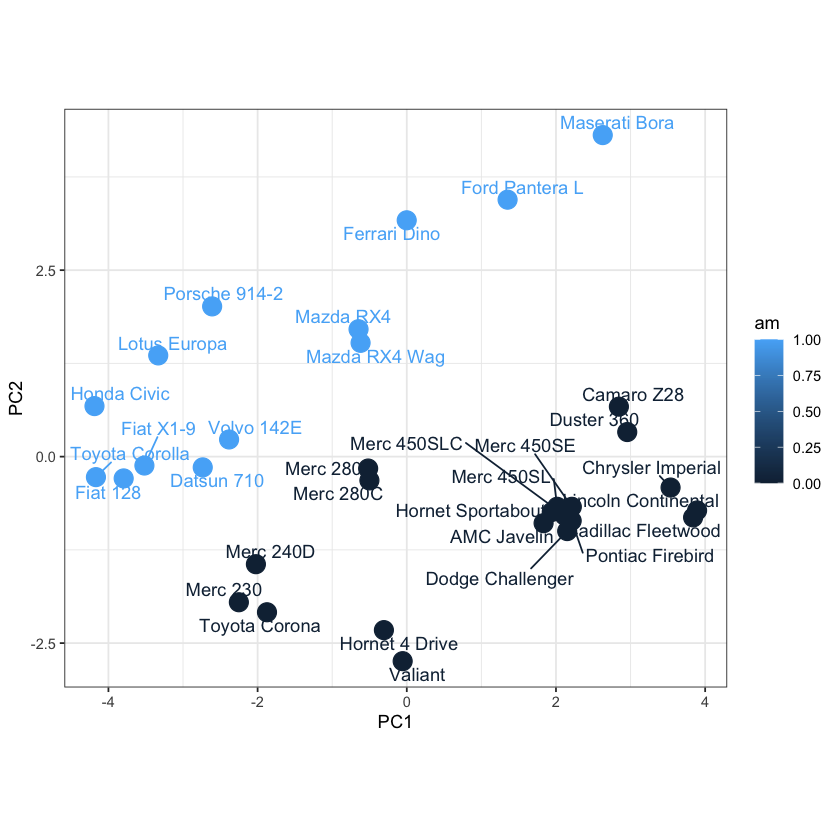

In [36]:
ggplot(cbind(data.frame(pcasc$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = am, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel() + coord_fixed()

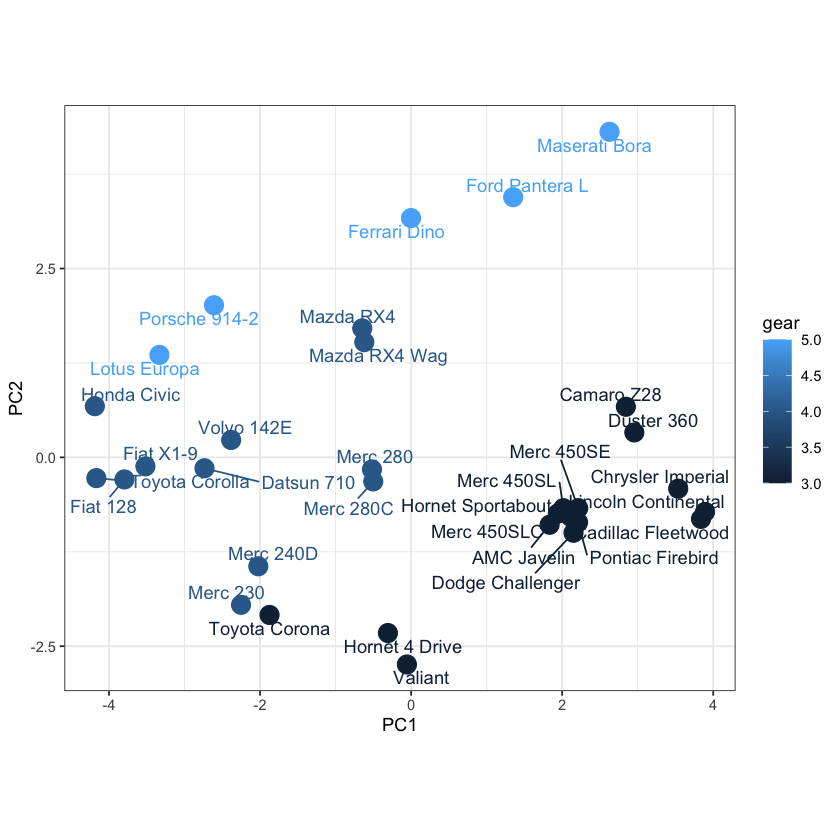

In [37]:
ggplot(cbind(data.frame(pcasc$x) %>% tibble::rownames_to_column("model"), mtcars), 
       aes(x = PC1, y = PC2, color = gear, label = model)) + 
geom_point(size = 5) + 
theme_bw() + 
geom_text_repel() + coord_fixed()

## Final thoughts

* The sign of the principal components is arbitrary - the variance of X is the same as the variance of -X. Thus, plots may look different just because one or the other of the axes have been flipped.
* You may have heard that the principal components are eigenvectors of the covariance matrix - how does that go along with the SVD that we have shown here? Recall that $$M=UDV^T.$$We're assuming that the columns of $M$ are centered, which means that, up to a constant, the covariance matrix of $M$ is equal to $$M^TM=(VDU^T)(UDV^T)=VD^2V^T$$(since $U$ is orthogonal). Multiplying from the right with e.g. the first column of $V$ gives $$M^TMv_1=VD^2V^Tv_1=d_1^2v_1,$$which shows that the columns of $V$ are eigenvectors of the covariance matrix of $M$, and the squared singular values are the corresponding eigenvalues. Similarly, the columns of $U$ are eigenvectors of $MM^T$.
* When performing PCA, it's good practice to record the fraction of the variance explained by each principal component. Also keep in mind that the 'expected' fraction depends on the size of the data set! With only two variables, the first two principal components will _always_ contain 100% of the variance. Similarly, if you have only three samples, in any dimension, and each variable is mean-centered, the three points will always lie in at most a 2-dimensional plane. The more variables and samples the data set contain, the less variance is expected to be contained in the first few principal components. See e.g. [this paper](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-12-307) for a principled approach to estimating whether the obtained subspace contains more variance than 'expected' in random data. 

## Shortcomings of PCA
* While PCA is widely used and often very useful, it does rely on the assumption that it makes sense to attempt to reproduce Euclidean distances, and that variance is a meaningful measure of 'information content'. If this is not the case, another method may be more suitable.
* Similarly, PCA will only allow the mapping from the high-dimensional to the low-dimensional space to be a linear projection. Nonlinear mappings are not considered. Similarly, it assumes that the data lies on a linear subspace of some dimension. There are nonlinear generalizations of PCA (kernel PCA), and of course many other dimensionality reduction techniques attempting to find nonlinear structure. 
* PCA assigns a weight to each feature, which can sometimes be difficult to interpret. Sparse variants have been developed (L1 penalty - only one among a set of correlated features will have a non-zero weight). 
* PCA is unsupervised, which is often a strength, but sometimes a shortcoming. If the goal is to find a projection that represents some external variable (e.g. a categorization of samples), there are other more suitable techniques, e.g., linear discriminant analysis (LDA) or partial least squares-discriminant analysis (PLS-DA).
* `COMMENT_MICHAEL: Is it worth mentioning PCA as a use for de-noising (svd, then set the lowest singular values to zero, then reconstructing)?`

## TODO
* approximate PCA, irlba, rsvd etc
* Mention other linear techniques (LDA, PLS, CCA)


## References